In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the master database
master_db = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Step2_DataPipeline\datapipeline\data\08_reporting\master_database.csv")


## 1.How many distinct patients are in the dataset?

In [2]:
master_db.columns


Index(['patient_id', 'birth_date', 'deathdate', 'social_security_number',
       'drivers', 'passport', 'prefix', 'first_name', 'last_name', 'suffix',
       'maiden_name', 'marital', 'race_x', 'ethnicity_x', 'birthplace',
       'address', 'city', 'state', 'county', 'fips', 'zipcode', 'latitude',
       'longitude', 'healthcare_expenses', 'healthcare_coverage',
       'annual_income', 'id', 'gender_x', 'race_y', 'ethnicity_y', 'age_begin',
       'age_end', 'pathology', 'num_symptoms', 'gender_y', 'Rash',
       'Joint Pain', 'Fatigue', 'Fever', 'start_datetime', 'stop_y', 'payer_y',
       'encounter_id', 'medication_id', 'description', 'base_cost',
       'payer_coverage_y', 'dispenses', 'totalcost', 'reasoncode_y',
       'reasondescription_y'],
      dtype='object')

In [4]:
master_db.drop_duplicates(subset=['patient_id'], inplace=True)

In [4]:
# 1. Count distinct patients
distinct_patients = master_db['patient_id'].nunique()
print(f"Number of distinct patients: {distinct_patients}")

Number of distinct patients: 10000


## 2. Plot the distinct medications over time

[11/29/24 17:34:13] WARNING  C:\Users\ABHISHEK                                                      warnings.py:110
                             BANKAWAT\AppData\Local\Temp\ipykernel_15224\608271063.py:3:                           
                             UserWarning: Converting to PeriodArray/Index representation will drop                 
                             timezone information.                                                                 
                               med_time_series =                                                                   
                             master_db.groupby([master_db['start_datetime'].dt.to_period('Y'),                     
                             'description'])['description'].count().unstack()                                      
                                                                                                                   

<Figure size 5000x2000 with 0 Axes>

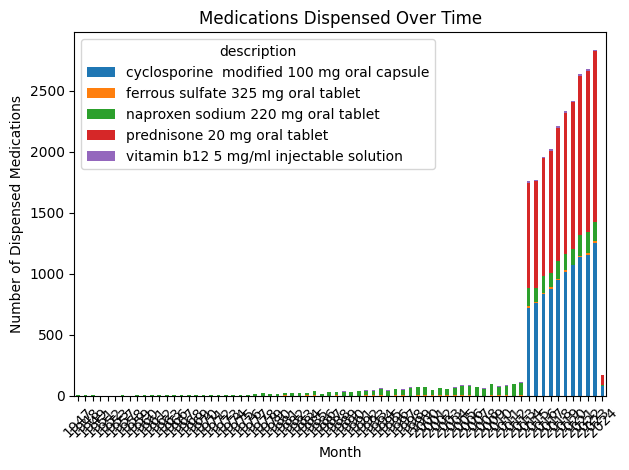

In [16]:
# 2. Medication over time plotting
master_db['start_datetime'] = pd.to_datetime(master_db['start_datetime'], errors='coerce')
med_time_series = master_db.groupby([master_db['start_datetime'].dt.to_period('Y'), 'description'])['description'].count().unstack()
plt.figure(figsize=(50,20))
med_time_series.plot(kind='bar', stacked=True)
plt.title('Medications Dispensed Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Dispensed Medications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Create a pie chart for the percentage of patients by racial category and gender

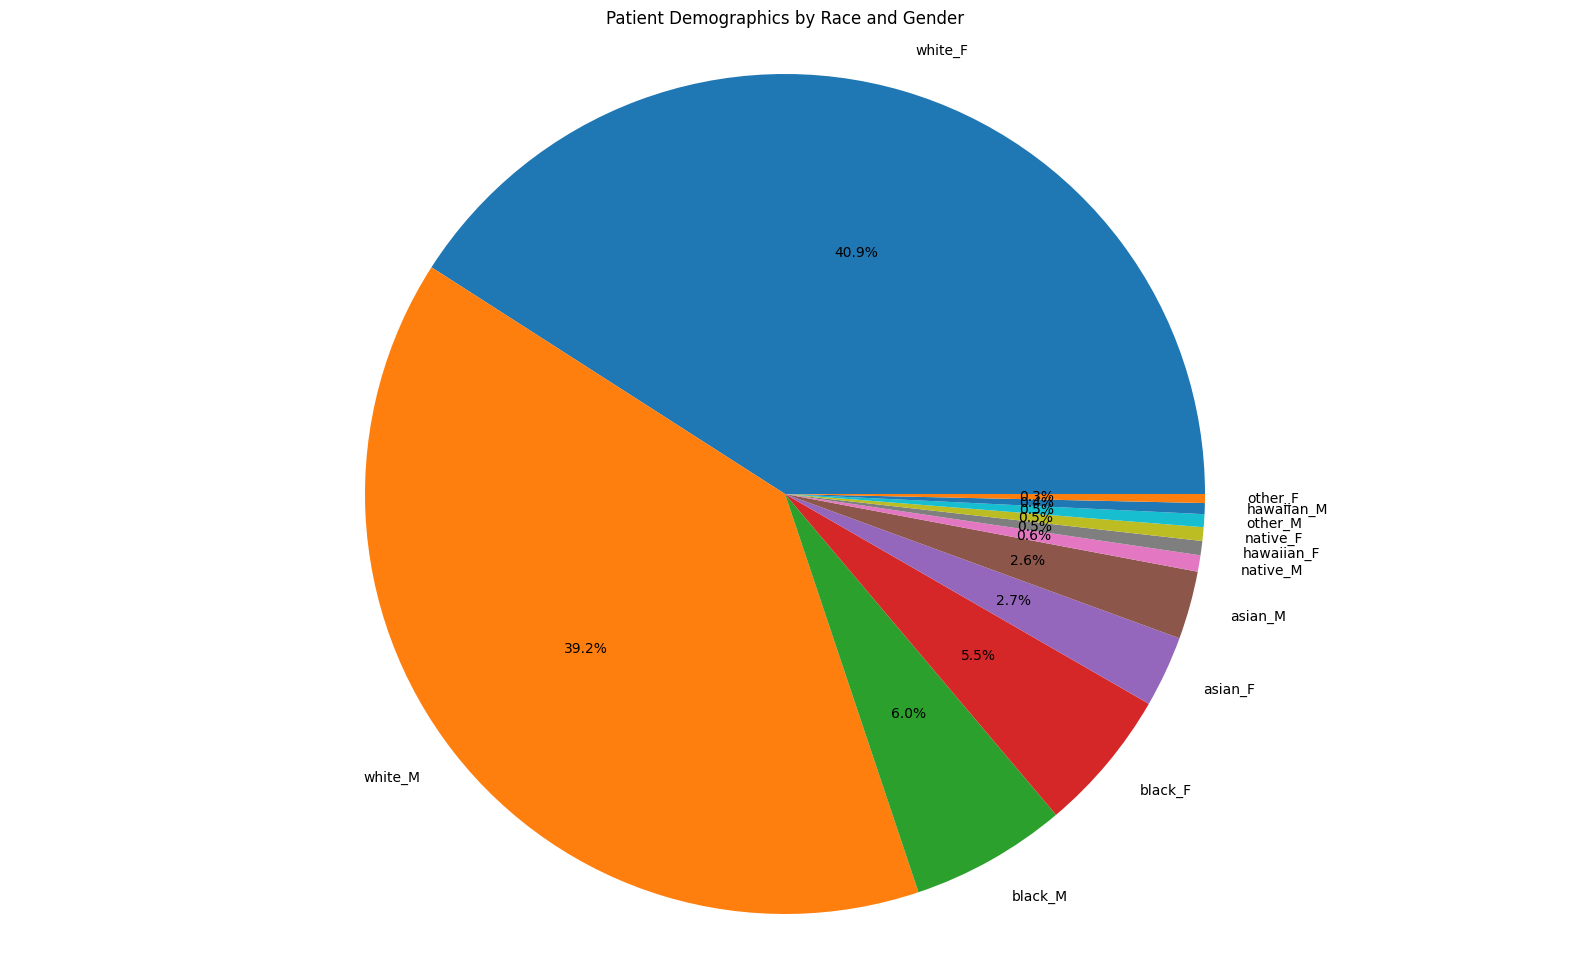

In [15]:
 #3. Pie chart of patient demographics
master_db['race_gender'] = master_db['race_x'] + '_' + master_db['gender_x']
race_gender_counts = master_db['race_gender'].value_counts()
plt.figure(figsize=(20,12))
plt.pie(race_gender_counts, labels=race_gender_counts.index, autopct='%1.1f%%')
plt.title('Patient Demographics by Race and Gender')
plt.axis('equal')
plt.show()

In [22]:
# Select the symptom columns
symptom_cols = ["Rash", "Joint Pain", "Fatigue", "Fever"]

# Drop rows with NaN values in the symptom columns
master_db = master_db.dropna(subset=symptom_cols)

# Convert the columns to integers
master_db[symptom_cols] = master_db[symptom_cols].astype(int)

# Filter patients where all symptom values are >= 30
patients_with_symptoms = master_db[
    (master_db[symptom_cols] >= 30).all(axis=1)
]

# Get the number of unique patients who meet the condition
patients_with_symptoms_count = patients_with_symptoms["patient_id"].nunique()

# Get the total number of distinct patients
distinct_patients = master_db["patient_id"].nunique()

# Calculate the percentage
percentage_patients = (patients_with_symptoms_count / distinct_patients) * 100

# Print the percentage of patients with all 4 symptoms >= 30
print(f"Percentage of patients with all 4 symptoms ≥ 30: {percentage_patients:.2f}%")

# Optionally, print the details of patients who meet the condition
print("Details of patients who meet the condition:")
print(patients_with_symptoms[["patient_id", "Rash", "Joint Pain", "Fatigue", "Fever"]])

Percentage of patients with all 4 symptoms ≥ 30: 0.00%
Details of patients who meet the condition:
Empty DataFrame
Columns: [patient_id, Rash, Joint Pain, Fatigue, Fever]
Index: []


In [18]:
patients_with_symptoms

0

In [ ]:
high_symptom_patients = df.drop_duplicates('patient_id')['symptoms'].apply(parse_symptoms)
percentage = (high_symptom_patients.sum() / len(high_symptom_patients)) * 100
print(f"Percentage of patients with all symptoms ≥ 30: {percentage:.2f}%")